# The Battle of the Neighborhoods

## Download, Explore & Web scrapping Population of New York city from Wikipedia

In [1]:
# library to handle data in a vectorized manner
import numpy as np 
# library for data analsysis
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# library to handle JSON files
import json 
 # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge geopy --yes
 # convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
 # library to handle requests
import requests
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
!conda install -c anaconda beautiful-soup --yes
 # package for parsing HTML and XML documents
from bs4 import BeautifulSoup
import urllib.request
 # implements classes to read and write tabular data in CSV form
import csv
print('Libraries imported.')

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0
  - defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda


PackagesNotFoundError: The following packages are not available from current channels:

  - beautiful-soup

Current channels:

  - https://conda.anaconda.org/anaconda/win-64
  - https://conda.anaconda.org/anaconda/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [2]:
# Webscrapping of Population of New York
import bs4 as bs
import urllib.request

website_url = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soupy = BeautifulSoup(website_url,'lxml')
table = soupy.find('table',{'class':'wikitable sortable'})
headers = [header.text for header in table.find_all('th')]
table_rows = table.find_all('tr')        

rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('NY_POP.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

print(rows)

[[], [], [], ['The Bronx\n', '\n  Bronx\n', '1,418,207\n', '42.695\n', '30,100\n', '42.10\n', '109.04\n', '33,867\n', '13,006\n'], ['Brooklyn\n', '\n  Kings\n', '2,559,903\n', '91.559\n', '35,800\n', '70.82\n', '183.42\n', '36,147\n', '13,957\n'], ['Manhattan\n', '\n  New York\n', '1,628,706\n', '600.244\n', '368,500\n', '22.83\n', '59.13\n', '71,341\n', '27,544\n'], ['Queens\n', '\n   Queens\n', '2,253,858\n', '93.310\n', '41,400\n', '108.53\n', '281.09\n', '20,767\n', '8,018\n'], ['Staten Island\n', '\n   Richmond\n', '476,143\n', '14.514\n', '30,500\n', '58.37\n', '151.18\n', '8,157\n', '3,150\n'], ['City of New York', '8,336,817', '842.343', '101,000', '302.64', '783.83', '27,547', '10,636\n'], ['State of New York', '19,453,561', '1,731.910', '89,000', '47,214', '122,284', '412', '159\n'], ['Sources:[14] and see individual borough articles\n']]


In [3]:
# Load data from CSV 
Pop_data=pd.read_csv('NY_POP.csv') 
print('Data downloaded!')

Data downloaded!


In [4]:
Pop_data

,New York City's five boroughsvte\r\n,Jurisdiction\r\n,Population\r\n,Gross Domestic Product\r\n,Land area\r\n,Density\r\n,Borough,County,Estimate (2019)[12],billions(US$)[13],per capita(US$),square miles,squarekm,persons / sq. mi,persons /km2\r\n
0,The Bronx\r\n,\r\n Bronx\r\n,"1,418,207\r\n",42.695\r\n,"30,100\r\n",42.10\r\n,109.04\r\n,"33,867\r\n","13,006\r\n",NaN,NaN,NaN,NaN,NaN,NaN
1,Brooklyn\r\n,\r\n Kings\r\n,"2,559,903\r\n",91.559\r\n,"35,800\r\n",70.82\r\n,183.42\r\n,"36,147\r\n","13,957\r\n",NaN,NaN,NaN,NaN,NaN,NaN
2,Manhattan\r\n,\r\n New York\r\n,"1,628,706\r\n",600.244\r\n,"368,500\r\n",22.83\r\n,59.13\r\n,"71,341\r\n","27,544\r\n",NaN,NaN,NaN,NaN,NaN,NaN
3,Queens\r\n,\r\n Queens\r\n,"2,253,858\r\n",93.310\r\n,"41,400\r\n",108.53\r\n,281.09\r\n,"20,767\r\n","8,018\r\n",NaN,NaN,NaN,NaN,NaN,NaN
4,Staten Island\r\n,\r\n Richmond\r\n,"476,143\r\n",14.514\r\n,"30,500\r\n",58.37\r\n,151.18\r\n,"8,157\r\n","3,150\r\n",NaN,NaN,NaN,NaN,NaN,NaN
5,City of New York,"8,336,817",842.343,"101,000",302.64,783.83,"27,547","10,636\r\n",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,State of New York,"19,453,561","1,731.910","89,000","47,214","122,284",412,159\r\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Sources:[14] and see individual borough articl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Remove whitespaces and rename columns 
Pop_data.columns = Pop_data.columns.str.replace(' ', '')
Pop_data.columns = Pop_data.columns.str.replace('\'','')
Pop_data.rename(columns={'Borough':'square_km','County':'persons_sq_mi'}, inplace=True)
Pop_data.rename(columns = { 'NewYorkCitysfiveboroughsvte\r\n' : 'Borough',
                   'Jurisdiction\r\n':'County',
                   'Population\r\n':'Estimate_2018', 
                   'GrossDomesticProduct\r\n':'GDP_in_billions',        
                   'Landarea\r\n':'Per_Capita',
                   'Density\r\n':'square_miles',                
                   'Estimate(2019)[12]':'persons_sq_km'}, inplace=True)

# Removing undesired columns
Pop_data.drop(Pop_data.columns[[9,10,11,12,13,14]], axis=1,inplace=True)
Pop_data

,Borough,County,Estimate_2018,GDP_in_billions,Per_Capita,square_miles,square_km,persons_sq_mi,persons_sq_km
0,The Bronx\r\n,\r\n Bronx\r\n,"1,418,207\r\n",42.695\r\n,"30,100\r\n",42.10\r\n,109.04\r\n,"33,867\r\n","13,006\r\n"
1,Brooklyn\r\n,\r\n Kings\r\n,"2,559,903\r\n",91.559\r\n,"35,800\r\n",70.82\r\n,183.42\r\n,"36,147\r\n","13,957\r\n"
2,Manhattan\r\n,\r\n New York\r\n,"1,628,706\r\n",600.244\r\n,"368,500\r\n",22.83\r\n,59.13\r\n,"71,341\r\n","27,544\r\n"
3,Queens\r\n,\r\n Queens\r\n,"2,253,858\r\n",93.310\r\n,"41,400\r\n",108.53\r\n,281.09\r\n,"20,767\r\n","8,018\r\n"
4,Staten Island\r\n,\r\n Richmond\r\n,"476,143\r\n",14.514\r\n,"30,500\r\n",58.37\r\n,151.18\r\n,"8,157\r\n","3,150\r\n"
5,City of New York,"8,336,817",842.343,"101,000",302.64,783.83,"27,547","10,636\r\n",NaN
6,State of New York,"19,453,561","1,731.910","89,000","47,214","122,284",412,159\r\n,NaN
7,Sources:[14] and see individual borough articl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Replace newline('\r\n') ran this on windows platform, however it (\n) is for Linux from each string from left and right sides 

Pop_data['Borough']=Pop_data['Borough'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['County']=Pop_data['County'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['Estimate_2018']=Pop_data['Estimate_2018'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['GDP_in_billions']=Pop_data['GDP_in_billions'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['Per_Capita']=Pop_data['Per_Capita'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['square_miles']=Pop_data['square_miles'].replace(to_replace='\r\n', value='', regex=True)

Pop_data['square_miles']=Pop_data['square_miles'].replace(to_replace='\r', value='', regex=True)
Pop_data['square_km']=Pop_data['square_km'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['square_km']=Pop_data['square_km'].replace(to_replace='\r', value='', regex=True)
Pop_data['persons_sq_mi']=Pop_data['persons_sq_mi'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['persons_sq_mi']=Pop_data['persons_sq_mi'].replace(to_replace='\r', value='', regex=True)
Pop_data['persons_sq_km']=Pop_data['persons_sq_km'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['persons_sq_km']=Pop_data['persons_sq_km'].replace(to_replace='\r', value='', regex=True)

# Shift data in the last two rows 
Pop_data.loc[5:,['persons_sq_mi','persons_sq_km']] = Pop_data.loc[2:,['persons_sq_mi','persons_sq_km']].shift(1,axis=1)
Pop_data.loc[5:,['square_km','persons_sq_mi']] = Pop_data.loc[2:,['square_km','persons_sq_mi']].shift(1,axis=1)
Pop_data.loc[5:,['square_miles','square_km']] = Pop_data.loc[2:,['square_miles','square_km']].shift(1,axis=1)
Pop_data.loc[5:,['Per_Capita','square_miles']] = Pop_data.loc[2:,['Per_Capita','square_miles']].shift(1,axis=1)
Pop_data.loc[5:,['GDP_in_billions','Per_Capita']] = Pop_data.loc[2:,['GDP_in_billions','Per_Capita']].shift(1,axis=1)
Pop_data.loc[5:,['Estimate_2018','GDP_in_billions']] = Pop_data.loc[2:,['Estimate_2018','GDP_in_billions']].shift(1,axis=1)
Pop_data.loc[5:,['County','Estimate_2018']] = Pop_data.loc[2:,['County','Estimate_2018']].shift(1,axis=1)
Pop_data.loc[5:,['Borough','County']] = Pop_data.loc[2:,['Borough','County']].shift(1,axis=1)

Pop_data

,Borough,County,Estimate_2018,GDP_in_billions,Per_Capita,square_miles,square_km,persons_sq_mi,persons_sq_km
0,The Bronx,Bronx,"1,418,207",42.695,"30,100",42.10,109.04,"33,867","13,006"
1,Brooklyn,Kings,"2,559,903",91.559,"35,800",70.82,183.42,"36,147","13,957"
2,Manhattan,New York,"1,628,706",600.244,"368,500",22.83,59.13,"71,341","27,544"
3,Queens,Queens,"2,253,858",93.310,"41,400",108.53,281.09,"20,767","8,018"
4,Staten Island,Richmond,"476,143",14.514,"30,500",58.37,151.18,"8,157","3,150"
5,NaN,City of New York,"8,336,817",842.343,"101,000",302.64,783.83,"27,547","10,636"
6,NaN,State of New York,"19,453,561","1,731.910","89,000","47,214","122,284",412,159
7,NaN,Sources:[14] and see individual borough articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Pop_data = Pop_data.fillna('')
Pop_data

,Borough,County,Estimate_2018,GDP_in_billions,Per_Capita,square_miles,square_km,persons_sq_mi,persons_sq_km
0,The Bronx,Bronx,"1,418,207",42.695,"30,100",42.10,109.04,"33,867","13,006"
1,Brooklyn,Kings,"2,559,903",91.559,"35,800",70.82,183.42,"36,147","13,957"
2,Manhattan,New York,"1,628,706",600.244,"368,500",22.83,59.13,"71,341","27,544"
3,Queens,Queens,"2,253,858",93.310,"41,400",108.53,281.09,"20,767","8,018"
4,Staten Island,Richmond,"476,143",14.514,"30,500",58.37,151.18,"8,157","3,150"
5,,City of New York,"8,336,817",842.343,"101,000",302.64,783.83,"27,547","10,636"
6,,State of New York,"19,453,561","1,731.910","89,000","47,214","122,284",412,159
7,,Sources:[14] and see individual borough articles,,,,,,,


In [8]:
# Removing unwanted rows
i = Pop_data[((Pop_data.County == 'Sources:[14] and see individual borough articles'))].index
Pop_data.drop(i)

,Borough,County,Estimate_2018,GDP_in_billions,Per_Capita,square_miles,square_km,persons_sq_mi,persons_sq_km
0,The Bronx,Bronx,"1,418,207",42.695,"30,100",42.10,109.04,"33,867","13,006"
1,Brooklyn,Kings,"2,559,903",91.559,"35,800",70.82,183.42,"36,147","13,957"
2,Manhattan,New York,"1,628,706",600.244,"368,500",22.83,59.13,"71,341","27,544"
3,Queens,Queens,"2,253,858",93.310,"41,400",108.53,281.09,"20,767","8,018"
4,Staten Island,Richmond,"476,143",14.514,"30,500",58.37,151.18,"8,157","3,150"
5,,City of New York,"8,336,817",842.343,"101,000",302.64,783.83,"27,547","10,636"
6,,State of New York,"19,453,561","1,731.910","89,000","47,214","122,284",412,159


In [9]:
# Saving final file into CSV file
Pop_data.to_csv('NY_POP.csv',index=False)

## Web scrapping of Demograhics data from wikipedia

In [10]:
import pkgutil
import encodings
import os

def all_encodings():
    modnames = set([modname for importer, modname, ispkg in pkgutil.walk_packages(
        path=[os.path.dirname(encodings.__file__)], prefix='')])
    aliases = set(encodings.aliases.aliases.values())
    return modnames.union(aliases)

text = b'\x96'
for enc in all_encodings():
    try:
        msg = text.decode(enc)
    except Exception:
        continue
    if msg == 'ñ':
        print('Decoding {t} with {enc} is {m}'.format(t=text, enc=enc, m=msg))

Decoding b'\x96' with mac_iceland is ñ
Decoding b'\x96' with mac_romanian is ñ
Decoding b'\x96' with mac_turkish is ñ
Decoding b'\x96' with mac_croatian is ñ
Decoding b'\x96' with mac_roman is ñ
Decoding b'\x96' with mac_farsi is ñ
Decoding b'\x96' with mac_arabic is ñ


C:\Users\PrevindraKumar\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: unicode_internal codec has been deprecated
  


In [11]:
# Web scrapping of Demographics data from wikipedia page using BeautifulSoup
website_url = requests.get('https://en.wikipedia.org/wiki/New_York_City').text
soupy = BeautifulSoup(website_url,'lxml')
#print(soupy.prettify())
final_link = soupy.find('table',{'class':'wikitable collapsible collapsed'})
final_link.decompose()

table = soupy.find('table',{'class':'wikitable collapsible collapsed'})
headers = [header.text for header in table.find_all('th')]
#print(headers)
table_rows = table.find_all('tr')        

rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('NY_DEMO.csv', 'w', newline='',encoding='utf-8') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

print(rows)

[[], ['White', '44.0%', '52.3%', '76.6%', '93.6%\n'], ['—Non-Hispanic', '33.3%', '43.2%', '62.9%[238]', '92.0%\n'], ['Black or African American', '25.5%', '28.7%', '21.1%', '6.1%\n'], ['Hispanic or Latino (of any race)', '28.6%', '24.4%', '16.2%[238]', '1.6%\n'], ['Asian', '12.7%', '7.0%', '1.2%', '–\n']]


In [12]:
# Load data from CSV 
data_z=pd.read_csv('NY_DEMO.csv')
print('Data downloaded!')

Data downloaded!


In [13]:
# Renaming column
data_z.rename(columns = {'Racial composition' : 'Composition', 
                         '2010[235]' : '2010',
                         '1990[237]':'1990',
                         '1970[237]':'1970', 
                         '1940[237]\n':'1940',
                        }, inplace=True)

data_z.columns = data_z.columns.str.replace(' ', '')
data_z= data_z.replace('\n','', regex=True)
data_z

,Composition,2010,1990,1970,1940
0,White,44.0%,52.3%,76.6%,93.6%
1,—Non-Hispanic,33.3%,43.2%,62.9%[238],92.0%
2,Black or African American,25.5%,28.7%,21.1%,6.1%
3,Hispanic or Latino (of any race),28.6%,24.4%,16.2%[238],1.6%
4,Asian,12.7%,7.0%,1.2%,–


In [14]:
# Saving dataset into CSV
data_z.to_csv('NY_DEMO.csv',index=False)

In [15]:
print("The diversity of NYC could be mainly classified into these types :") 
data_z['Composition']

The diversity of NYC could be mainly classified into these types :


0                               White
1                       —Non-Hispanic
2           Black or African American
3    Hispanic or Latino (of any race)
4                               Asian
Name: Composition, dtype: object

## It is also important to note that there is a steady increase in the population of the Hispanic/Latino and Asians in these regions. This would give us a deeper insight in changing trends for the years to come.

# Exploring  Income Data

In [2]:
# library to handle data in a vectorized manner
import numpy as np 
# library for data analsysis
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# library to handle JSON files
import json 
# uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge geopy --yes 
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 
# library to handle requests
import requests 
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

!conda install -c conda-forge wordcloud==1.4.1 --yes
from wordcloud import STOPWORDS, WordCloud

# uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge folium=0.5.0 --yes 
# map rendering library
import folium 

print ('Wordcloud is installed and imported!')
print('Libraries imported.')

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::openssl-1.1.1d-he774522_4
  - defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda


Examining wordcloud==1.4.1: 100%|##########| 2/2 [00:00<00:00,  4.40it/s]
                                                                         

Examining conflict for python wordcloud:   0%|          | 0/2 [00:00<?, ?it/s]
                                                                              

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - wordcloud==1.4.1 -> python[version='2.7.*|3.5.*|3.6.*']

Your python: python=3.7

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.





Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::openssl-1.1.1d-he774522_4
  - defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - anaconda

In [4]:
import matplotlib.pyplot as plt
from PIL import Image 

%matplotlib inline

import matplotlib as mpl

mpl.style.use('ggplot') # optional: for ggplot-like style

print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

!conda install -c anaconda beautiful-soup --yes
 # package for parsing HTML and XML documents
from bs4 import BeautifulSoup

# implements classes to read and write tabular data in CSV form
import csv 
print('Libraries imported.')

Matplotlib version:  3.1.3
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - beautiful-soup

Current channels:

  - https://conda.anaconda.org/anaconda/win-64
  - https://conda.anaconda.org/anaconda/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




Libraries imported.


In [5]:
website_url = requests.get('https://en.wikipedia.org/wiki/New_York_City#Boroughs').text
soupy = BeautifulSoup(website_url,'lxml')
table = soupy.find('table',{'class':'wikitable sortable'})
headers = [header.text for header in table.find_all('th')]
table_rows = table.find_all('tr')        

rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('NY_INCOME.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

In [6]:
Pop_income=pd.read_csv('NY_INCOME.csv')
Pop_income.drop(Pop_income.columns[[1,6,7,8,9,10,11,12,13,14]], axis=1,inplace=True)

In [7]:
Pop_income

,New York City's five boroughsvte\r\n,Population\r\n,Gross Domestic Product\r\n,Land area\r\n,Density\r\n
0,The Bronx\r\n,"1,418,207\r\n",42.695\r\n,"30,100\r\n",42.10\r\n
1,Brooklyn\r\n,"2,559,903\r\n",91.559\r\n,"35,800\r\n",70.82\r\n
2,Manhattan\r\n,"1,628,706\r\n",600.244\r\n,"368,500\r\n",22.83\r\n
3,Queens\r\n,"2,253,858\r\n",93.310\r\n,"41,400\r\n",108.53\r\n
4,Staten Island\r\n,"476,143\r\n",14.514\r\n,"30,500\r\n",58.37\r\n
5,City of New York,842.343,"101,000",302.64,783.83
6,State of New York,"1,731.910","89,000","47,214","122,284"
7,Sources:[154] and see individual borough artic...,NaN,NaN,NaN,NaN


In [8]:
Pop_income.rename(columns = {'New York City\'s five boroughsvte\r\n' : 'Borough',
                   'Population\r\n':'Population', 
                   'Land area\r\n':'land',
                    'Density\r\n':'square_km',
                    'Gross Domestic Product\r\n':'gdp'}, inplace=True)

Pop_income

,Borough,Population,gdp,land,square_km
0,The Bronx\r\n,"1,418,207\r\n",42.695\r\n,"30,100\r\n",42.10\r\n
1,Brooklyn\r\n,"2,559,903\r\n",91.559\r\n,"35,800\r\n",70.82\r\n
2,Manhattan\r\n,"1,628,706\r\n",600.244\r\n,"368,500\r\n",22.83\r\n
3,Queens\r\n,"2,253,858\r\n",93.310\r\n,"41,400\r\n",108.53\r\n
4,Staten Island\r\n,"476,143\r\n",14.514\r\n,"30,500\r\n",58.37\r\n
5,City of New York,842.343,"101,000",302.64,783.83
6,State of New York,"1,731.910","89,000","47,214","122,284"
7,Sources:[154] and see individual borough artic...,NaN,NaN,NaN,NaN


In [9]:
Pop_income = Pop_income[:5]
Pop_income.columns = Pop_income.columns.str.replace(' ', '')
Pop_income.columns = Pop_income.columns.str.replace('\'','')
Pop_income['Borough']=Pop_income['Borough'].replace(to_replace='\r\n', value='', regex=True)
Pop_income['Population']=Pop_income['Population'].replace(to_replace='\r\n', value='', regex=True)
Pop_income['gdp']=Pop_income['gdp'].replace(to_replace='\r\n', value='', regex=True)
Pop_income['land']=Pop_income['land'].replace(to_replace='\r\n', value='', regex=True)
Pop_income['square_km']=Pop_income['square_km'].replace(to_replace='\r\n', value='', regex=True)
Pop_income

C:\Users\PrevindraKumar\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\PrevindraKumar\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\PrevindraKumar\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Borough,Population,gdp,land,square_km
0,The Bronx,"1,418,207",42.695,"30,100",42.10
1,Brooklyn,"2,559,903",91.559,"35,800",70.82
2,Manhattan,"1,628,706",600.244,"368,500",22.83
3,Queens,"2,253,858",93.310,"41,400",108.53
4,Staten Island,"476,143",14.514,"30,500",58.37


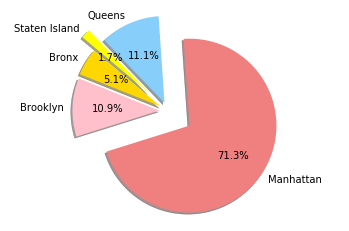

In [10]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'
sizes = Pop_income['gdp']
colors = ['gold', 'pink', 'lightcoral', 'lightskyblue', 'yellow']
explode = (0.1, 0.1, 0.3, 0.1, 0.3)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()